GPT 4


Revised Code

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]



scaler = StandardScaler()
x_scaled = scaler.fit_transform(np.array(x_values).reshape(-1, 1))


poly = PolynomialFeatures(degree=10)
X_poly_scaled = poly.fit_transform(x_scaled)




ols_regressor = LinearRegression()
ols_regressor.fit(X_poly_scaled, y)
ols_coefficients = ols_regressor.coef_

print(ols_coefficients)




ridge = Ridge(alpha=500.0)  # Adjusted regularization strength
ridge.fit(X_poly_scaled, y_values)
coefficients_ridge_scaled = ridge.coef_
print(coefficients_ridge_scaled)



[ 0.00000000e+00 -4.44871000e+09  3.82208321e+10  4.26626090e+10
 -1.39383223e+11 -9.37883573e+10  1.83264466e+11  7.02084077e+10
 -9.23368010e+10 -2.67738811e+10  1.88979260e+10]
[ 0.00000000e+00 -2.73092187e+08  2.99550668e+08 -5.93483152e+08
  5.61740266e+08 -1.22691528e+09  8.58244868e+08 -2.61070672e+09
  9.94354837e+08 -5.80295234e+09  1.57945301e+08]


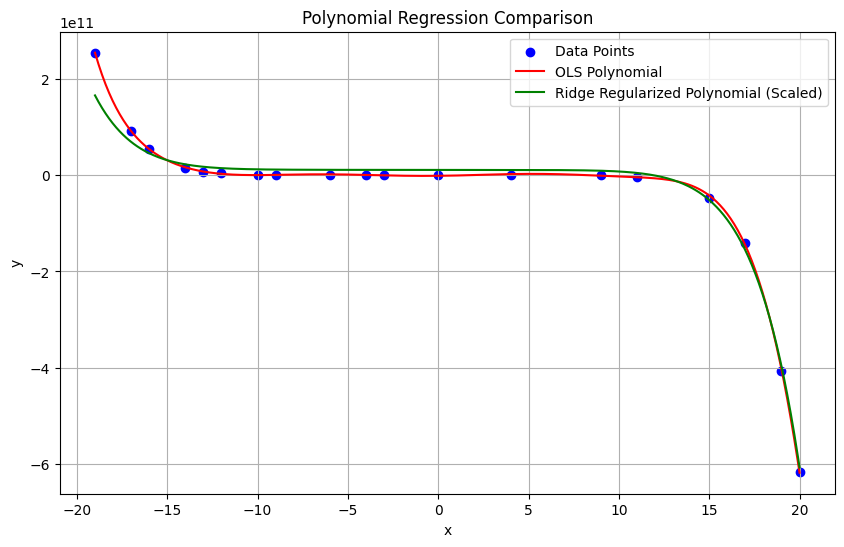

In [120]:

# Generate x values for plotting
x_plot = np.linspace(min(x_values), max(x_values), 400)
x_plot_scaled = scaler.transform(x_plot.reshape(-1, 1))
X_plot_poly_scaled = poly.transform(x_plot_scaled)

# Generate y values for OLS polynomial
y_ols = np.polyval(coefficients_ols, x_plot)

# Generate y values for Ridge polynomial with scaled features
y_ridge_scaled = ridge.predict(X_plot_poly_scaled)

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_plot, y_ols, color='red', label='OLS Polynomial')
plt.plot(x_plot, y_ridge_scaled, color='green', label='Ridge Regularized Polynomial (Scaled)')
plt.legend()
plt.title('Polynomial Regression Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
